#Import

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score , classification_report

#DATASET

In [24]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [26]:
print('---Sex')
print(df['Sex'].value_counts())
print('---ChestPainType')
print(df['ChestPainType'].value_counts())
print('---RestingECG')
print(df['RestingECG'].value_counts())
print('---ExerciseAngina')
print(df['ExerciseAngina'].value_counts())
print("---ST_Slope")
print(df['ST_Slope'].value_counts())

---Sex
M    725
F    193
Name: Sex, dtype: int64
---ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
---RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
---ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
---ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [27]:
sex = {'M':0,'F':1}
chest_pain_type= {'ASY':0,'NAP':1,'ATA':2,'TA':3}
resting_ecg = {'Normal':0,'ST':1,'LVH':2}
exercise_angina = {'N':0,'Y':1}
st_slope = {'Flat':0,'Up':1,'Down':2}
df = df.replace(sex)
df = df.replace(chest_pain_type)
df = df.replace(resting_ecg)
df = df.replace(exercise_angina)
df = df.replace(st_slope)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0,1
914,68,0,0,144,193,1,0,141,0,3.4,0,1
915,57,0,0,130,131,0,0,115,1,1.2,0,1
916,57,1,2,130,236,0,2,174,0,0.0,0,1


#PREPOSESING

In [28]:
for x in df.columns:
  mean = df[x].mean()
  sd = df[x].std()
  lowBound = mean - 3 * sd
  uppBound = mean + 3 * sd
  df = df[(df[x] >= lowBound) & (df[x] <= uppBound)]
print(df.shape)
df.head()

(899, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0


In [29]:
df_feature = df.iloc[:,:-1]
df_target = df.iloc[:,-1]
print(df_feature.shape)
print(df_target.shape)

(899, 11)
(899,)


In [30]:
scaler = StandardScaler()
scaler.fit(df_feature)
df_feature = scaler.transform(df_feature)
pd.DataFrame(df_feature).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.428154,-0.515943,1.339390,0.465900,0.849636,-0.550362,-0.745031,1.384320,-0.822945,-0.855469,0.714228
1,-0.475855,1.938199,0.265249,1.634714,-0.168122,-0.550362,-0.745031,0.752973,-0.822945,0.137516,-0.923759
2,-1.745588,-0.515943,1.339390,-0.118507,0.793612,-0.550362,0.499918,-1.535661,-0.822945,-0.855469,0.714228
3,-0.581666,1.938199,-0.808891,0.349019,0.149344,-0.550362,-0.745031,-1.141069,1.215148,0.634008,-0.923759
4,0.053200,-0.515943,0.265249,1.050307,-0.028064,-0.550362,-0.745031,-0.588640,-0.822945,-0.855469,0.714228


In [31]:
norm = Normalizer()
norm.fit(df_feature)
df_feature = norm.transform(df_feature)
pd.DataFrame(df_feature).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.457793,-0.165385,0.429340,0.149344,0.272350,-0.176418,-0.238819,0.443742,-0.263794,-0.274219,0.228945
1,-0.152565,0.621410,0.085042,0.524109,-0.053902,-0.176453,-0.238866,0.241412,-0.263846,0.044089,-0.296168
2,-0.536625,-0.158610,0.411753,-0.036431,0.243971,-0.169191,0.153684,-0.472090,-0.252988,-0.262986,0.219567
3,-0.185946,0.619601,-0.258585,0.111574,0.047742,-0.175939,-0.238171,-0.364775,0.388457,0.202679,-0.295306
4,0.024894,-0.241428,0.124120,0.491476,-0.013132,-0.257534,-0.348626,-0.275445,-0.385085,-0.400304,0.334213


#Train Test Split

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_feature,df_target, test_size=0.3, random_state=1)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(629, 11)
(270, 11)
(629,)
(270,)


In [33]:
pd.DataFrame(Xtrain[0]).head()

,0
0,-0.015582
1,-0.152809
2,-0.239572
3,-0.208185
4,-0.547573


# Linier Regression

In [34]:
#Training/Estimation
linreg = LinearRegression()
linreg.fit(Xtrain,ytrain)
print('Intercept=', linreg.intercept_)
print('Coeff=', linreg.coef_)

Intercept= 0.5516104731759442
Coeff= [ 0.08443054 -0.26942463 -0.36979212 -0.01545205 -0.26745101  0.26114788
  0.0303096  -0.11421914  0.2594796   0.33292241 -0.32122792]


MSE = 0.11752794160467865
accuracy = 53.9292 %



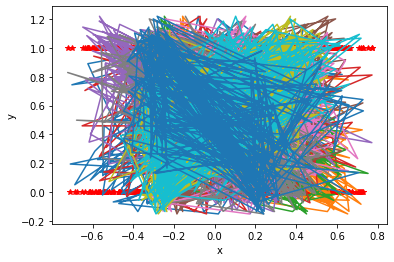

In [35]:
ypredLinred = linreg.predict(Xtest)
mse = mean_squared_error(ytest,ypredLinred)
r2 = 100 * linreg.score(Xtrain,ytrain)
# f1 = 100*f1_score(ytest,ypredLinred)
# print('F1 Score = %g %%'%(f1))
print('MSE =',mse)
print('accuracy = %g %%'%(r2))
print("")
plt.plot(Xtest,ytest,'*r')
plt.plot(Xtest,ypredLinred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Polynomial Regression

In [36]:
polyFeat = PolynomialFeatures()
xtrainPoly = polyFeat.fit_transform(Xtrain)
xtestPoly = polyFeat.transform(Xtest)
linreg = LinearRegression()
linreg.fit(xtrainPoly,ytrain)

LinearRegression()

MSE = 0.11158588020889848
accuracy = 54.8077 %



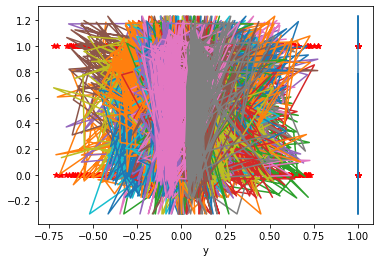

In [37]:
#Predict Y
ypred = linreg.predict(xtestPoly)
mse = mean_squared_error(ytest,ypred)
r2 = 100 * linreg.score(xtestPoly,ytest)
print('MSE =',mse)
print('accuracy = %g %%'%(r2))
print("")
plt.plot(xtestPoly, ytest , '*r')
plt.plot(xtestPoly,ypred)
plt.xlabel('x')
plt.xlabel('y')
plt.show()

#Logistic Regression

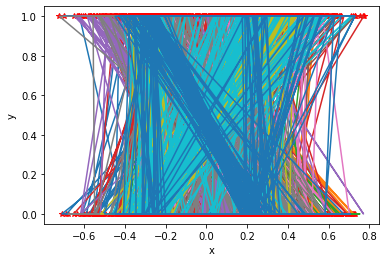

In [38]:
logr = LogisticRegression()
logr.fit(Xtrain,ytrain)
ypred = logr.predict(Xtest)

plt.plot(Xtest,ytest,'*r')
plt.plot(Xtest,ypred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
mse = mean_squared_error(ytest,ypred)
r2 = 100 * logr.score(Xtest,ytest)
print('MSE =',mse)
print('Accuracy %0.2f %%'%r2)

MSE = 0.13333333333333333
Accuracy 86.67 %


#Prediksi

In [40]:
def prediksi(data):
  #sample[0] -> Memiliki Penyakit Jantung , sample[1]->New Data Predic , sample[2]->Tidak Memiliki Penyakit Jantung
  sample = [[48,1,0,138,214,0,0,108,1,1.5,0],data,[40, 0, 2, 140, 289, 0, 0, 172, 0, 0.0, 1]]
  #Preprosesing Data
  scaler = StandardScaler()
  sample = scaler.fit_transform(sample)
  norm = Normalizer()
  sample = norm.fit_transform(sample)
  #Pred
  pred = logr.predict(sample)
  if(pred[1]==0):
    return "Tidak Memiliki Penyakit Jantung"
  else:
    return "Memiliki Penyakit Jantung"

In [42]:
data = []
age = int(input("Input Age : "))
sex = input("Gender (M/L) : ")
chest_pain_type = input("Chest Pain Type (ASY/NAP/ATA/TA) : ")
restingBP = int(input("Resting BP : "))
cholestrol = int(input("Cholesterol : "))
fastingBS = input("Fasting Blood Sugar (Yes/No) : ")
restingECG = input("Resting ECG (Normal,LVH,ST) : ")
maxHR = int(input("Max Heart Rate : "))
exercise_angina = input("Exercise Angina (N/Y) : ")
Oldpeak = float(input("Old Peak : "))
st_slope = input("ST Slope Flat/Up/Down : ")

#Append Data

#Age
data.append(age)

#Sex
if(sex=="M"):
  sex=0
else:
  sex=1
data.append(sex)

#Chest_Pain_Type
if(chest_pain_type=="ASY"):
  chest_pain_type = 0
elif(chest_pain_type=="NAP"):
  chest_pain_type = 1
elif(chest_pain_type=="ATA"):
  chest_pain_type = 2
else:
  chest_pain_type = 3
data.append(chest_pain_type)

#Resting BP
data.append(restingBP)

#cholestrol
data.append(cholestrol) 

#Fasting BS
if(fastingBS=="Yes"):
  fastingBS = 1
else:
  fastingBS = 0
data.append(fastingBS)

#restingECG
if(restingECG =="Normal"):
  restingECG = 0
elif(restingECG == "ST"):
  restingECG = 1
else:
  restingECG = 2
data.append(restingECG)

#Max Heart Rate
data.append(maxHR)

#exercise_angina
if(exercise_angina=="N"):
  exercise_angina = 0
else:
  exercise_angina = 1
data.append(exercise_angina)
#Oldpeak
data.append(Oldpeak)
#st slope
if(st_slope=="Flat"):
  st_slope = 0
elif(st_slope=="Up"):
  st_slope = 1
else:
  st_slope = 2
data.append(st_slope)


print("")
print("--Hasil Prediksi--")
print(data)
print(prediksi(data))

Input Age : 36
Gender (M/L) : M
Chest Pain Type (ASY/NAP/ATA/TA) : ATA
Resting BP : 120
Cholesterol : 267
Fasting Blood Sugar (Yes/No) : No
Resting ECG (Normal,LVH,ST) : Normal
Max Heart Rate : 160
Exercise Angina (N/Y) : No
Old Peak : 3
ST Slope Flat/Up/Down : Flat

--Hasil Prediksi--
[36, 0, 2, 120, 267, 0, 0, 160, 1, 3.0, 0]
Memiliki Penyakit Jantung
